In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from nabiim import *

In [2]:
'''Transactional data'''
datafile='trans19.csv'#'raif_values.csv'
data=pd.read_csv(datafile)
data

,client,card,date,amt,mcc,group,value
0,1378858,2391344,2019-01-15,350.87,5499,food,survival
1,3103680,3187433,2019-01-15,2660.00,5331,nonfood,socialization
2,2136426,3762147,2019-01-15,485.00,5331,nonfood,socialization
3,2450420,3674008,2019-01-15,4000.00,6011,money,money
4,1134488,2862980,2019-01-15,1404.40,5411,food,survival
...,...,...,...,...,...,...,...
3626615,1414524,4625952,2019-12-14,4000.00,6011,money,money
3626616,2136509,3573708,2019-12-14,97.90,5411,food,survival
3626617,2906095,4238838,2019-12-14,4000.00,6011,money,money
3626618,1401266,4573942,2019-12-14,179.00,5399,nonfood,socialization


In [3]:
data.drop(data[data.value=='money'].index).value.value_counts()[:3]

survival            2181649
socialization        633208
self_realization     322856
Name: value, dtype: int64

In [4]:
'''Groups and SSSR values'''
survival = ['food', 'outfit', 'dwelling', 'health']
socialization = ['remote','travel','nonfood','telecom','misc']
self_realization = ['beauty', 'kids','fun', 'charity']
high=[survival,socialization,self_realization]
highlab=['survival','socialization','self_realization']

In [5]:
'''Transactions for a single customer (binary)'''
prof=pd.DataFrame()
prof['day']=data.date.unique()
users=list(data.client.value_counts().index)
#print(users[70])
code=[]
for val in highlab:
    prof[val]=GetTrans(data, users[70], val).bin
prof['code'] = [int('0b'+''.join(i), 2) for i in prof[highlab].values.astype(str)]
prof

,day,survival,socialization,self_realization,code
0,2019-01-15,1,0,1,5
1,2019-01-16,1,1,0,6
2,2019-01-17,1,1,0,6
3,2019-01-18,1,1,0,6
4,2019-01-19,0,1,1,3
...,...,...,...,...,...
329,2019-12-10,1,1,1,7
330,2019-12-11,1,1,0,6
331,2019-12-12,0,1,0,2
332,2019-12-13,1,0,1,5


In [6]:
'''Realised predictability estimated by measuring neural network'''
hor=pd.read_csv('res_19.csv') #''res_raif.csv'' - for Raiffeisen
hor.round(2)

,id,survival,socialization,self_realization
0,498117,0.17,0.19,0.59
1,3483687,0.82,0.96,0.41
2,224763,0.95,0.52,0.22
3,3126372,0.32,0.03,0.31
4,2472046,0.86,0.71,0.10
...,...,...,...,...
5095,2749669,0.62,0.21,0.82
5096,2643195,0.23,0.49,0.81
5097,2266384,0.06,0.41,0.67
5098,65394,0.07,0.38,0.71


In [7]:
'''Aggregated predictability measure '''
hor['aggregated']=np.sqrt((hor[highlab]**2).sum(axis=1)/3.)
hor.id=hor.id.astype(str)
hor.describe()

,survival,socialization,self_realization,aggregated
count,5100.000000,5100.000000,5100.000000,5100.000000
mean,0.293031,0.369267,0.522769,0.449774
std,0.237103,0.237004,0.247985,0.144320
min,0.000000,0.000000,0.000000,0.029012
25%,0.119266,0.172103,0.327548,0.348835
50%,0.216216,0.333333,0.532258,0.451257
75%,0.394495,0.544715,0.715805,0.549155
max,1.000000,1.000000,1.000000,0.961170


array([[<AxesSubplot:title={'center':'survival'}>,
        <AxesSubplot:title={'center':'socialization'}>],
       [<AxesSubplot:title={'center':'self_realization'}>,
        <AxesSubplot:title={'center':'aggregated'}>]], dtype=object)

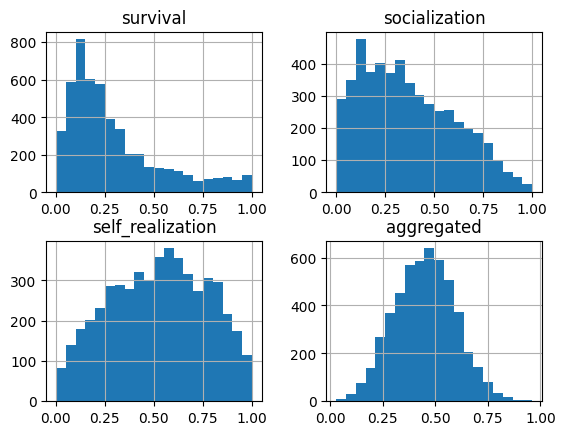

In [8]:
'''Realised predictability distribution'''
hor.hist(bins=20)

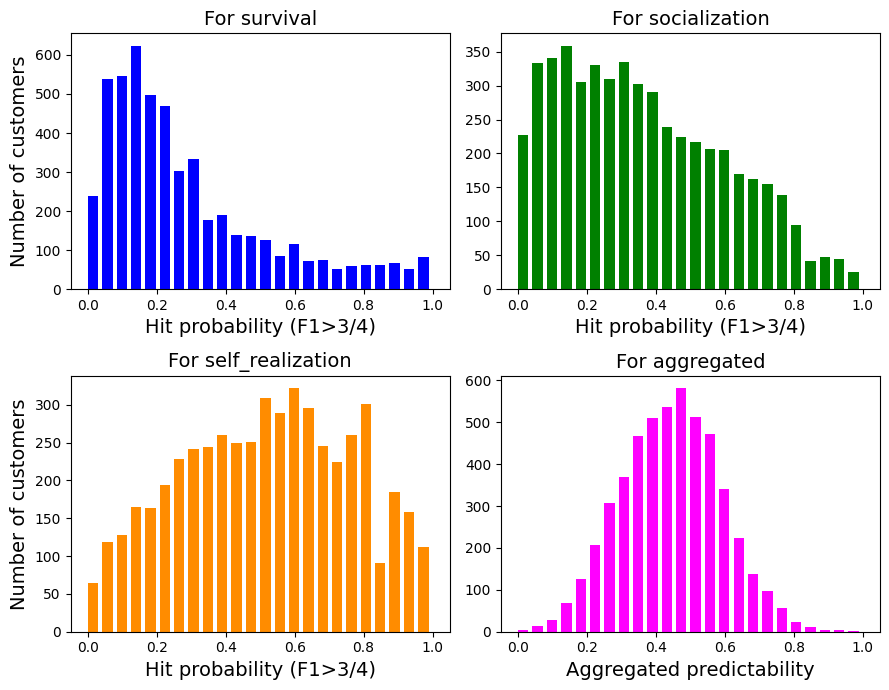

In [9]:
'''Data analysis for realized predictability (Fig.3)'''
x=np.linspace(-0.,1.,25)
columns=['survival','socialization','self_realization','aggregated']
colors=['blue', 'green','darkorange', 'magenta']
labels=['Hit probability (F1>3/4)']*3+['Aggregated predictability']
plt.figure(figsize=(9,7))
for i,j in enumerate(zip(columns, colors, labels)):
    plt.subplot(2,2,i+1)
    plt.title('For '+j[0], size=14)
    plt.hist(hor[j[0]],x, width=0.03, color=j[1], align='mid')
    plt.xlabel(j[2], size=14)
    if not i%2:
        plt.ylabel('Number of customers', size=14)
plt.tight_layout()
# plt.savefig('Fig3.png',dpi=600, format='png',
#         bbox_inches=None, pad_inches=0.1,
#         facecolor='auto'
#        )
plt.show()

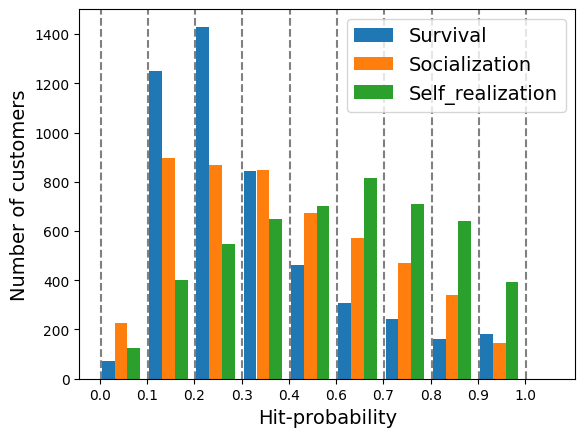

In [10]:
'''Data analysis for realized predictability (Fig.3_1)'''
x=np.linspace(-0.,1.,10)
for i,v in enumerate(highlab):
    plt.hist(hor[v]+0.1,x+i/33.3, width=0.03, label=v.capitalize(), align='mid')
for i in x[:]:
    plt.axvline(i-0.003, ls='--', c='gray')
plt.legend(fontsize=14)
#plt.xticks(x[:-1]/10+0.15, x[:-1].astype(int)+2)
plt.xticks(x[:]-.005, (x[:]).round(1))
plt.xlabel('Hit-probability', size=14)
plt.ylabel('Number of customers', size=14)
# plt.savefig('Fig3_1.png',dpi=600, format='png',
#         bbox_inches=None, pad_inches=0.1,
#         facecolor='auto'
#        )
plt.show()

In [11]:
'''Complexity by Huffman, LZW univariate LZ for those who have been forecasted
It may take a long time for a large population 
Use cmpl_19.csv to save time '''
compl=[]
lzw=[]
comlz=[]
from tqdm import tqdm
for user in tqdm(hor['id'].values):
    prof=pd.DataFrame()
    prof['day']=data.date.unique()
    code=[]
    for val in highlab:
        s=GetTrans(data, int(user), val).bin
        prof[val]=s
        code.append(LempelZiv(s)) #procedure from nabiim.py
    comlz.append(code)
    prof['code'] = [int('0b'+''.join(i), 2) for i in prof[highlab].values.astype(str)]
    textus=prof['code'].values
    table=huffman_code(textus) #procedure from nabiim.py
    code=''
    for i in textus:
        code+=table[i]
    compl.append(len(code)/len(textus)/3)
    textus=''.join(prof['code'].values.astype(str))
    cd,dictionary=LZW_compress(textus) #procedure from nabiim.py
    compression=len(cd)/len(textus) #+len(dictionary)
    lzw.append(compression)
hor['Huffman']=np.where(np.array(compl)>0, (np.array(compl)-1/3)*1.5, 0)
hor['LZW']=np.where(np.array(lzw)<=1, np.array(lzw), 1.)
hor[['LZ_'+i for i in highlab]]=np.array(comlz)
hor.round(3)

100%|████████████████████████████████████████████████████████████████████████████| 5100/5100 [1:50:53<00:00,  1.30s/it]


,id,survival,socialization,self_realization,aggregated,Huffman,LZW,LZ_survival,LZ_socialization,LZ_self_realization
0,498117,0.174,0.193,0.587,0.371,0.891,0.497,39,34,35
1,3483687,0.821,0.960,0.415,0.768,0.172,0.246,16,10,16
2,224763,0.948,0.523,0.220,0.638,0.707,0.464,24,37,42
3,3126372,0.325,0.028,0.312,0.261,0.680,0.416,19,32,34
4,2472046,0.863,0.706,0.101,0.647,0.731,0.428,22,34,42
...,...,...,...,...,...,...,...,...,...,...
5095,2749669,0.619,0.205,0.824,0.607,0.298,0.302,26,22,9
5096,2643195,0.234,0.492,0.808,0.563,0.295,0.311,28,19,9
5097,2266384,0.064,0.410,0.672,0.456,0.340,0.344,38,17,13
5098,65394,0.073,0.377,0.712,0.467,0.433,0.383,42,25,14


In [12]:
hor.to_csv('cmpl_19.csv', index=False)

In [13]:
hor=pd.read_csv('cmpl_19.csv')

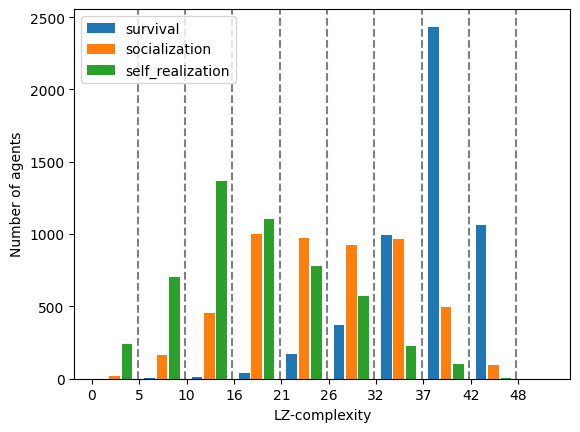

In [14]:
x=np.linspace(0,hor.iloc[:,7:].values.max(),10)
for i,v in enumerate(highlab):
    plt.hist(hor['LZ_'+v],x+(i-1.1)*1.4, width=1.2, label=v, align='mid')
for i in x[:-1]:
    plt.axvline(i+3.05, ls='--', c='gray')
plt.legend()
plt.xticks(x[:]-2.1, x[:].astype(int))
plt.xlabel('LZ-complexity')
plt.ylabel('Number of agents')
plt.show()

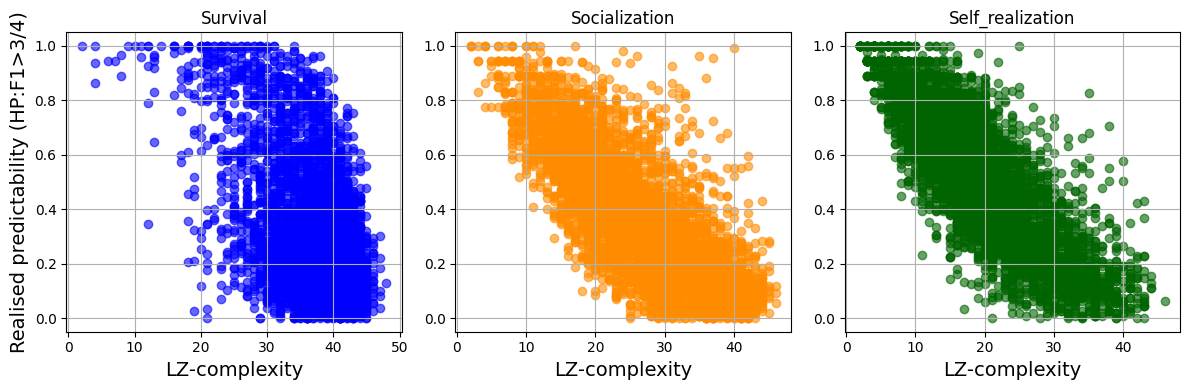

In [15]:
'''Fig 4. (7)'''
colors=['blue', 'darkorange', 'darkgreen']
plt.figure(figsize=(12,4))
for i,c in enumerate(highlab):
    plt.subplot(1,3,i+1)
    plt.scatter(hor['LZ_'+c],hor[c], alpha=.6, c=colors[i])
    plt.title(c.capitalize())
    plt.xlabel('LZ-complexity', size=14)
    if not i:
        plt.ylabel('Realised predictability (HP:F1>3/4)',size=14)
    plt.grid()
plt.tight_layout()
# plt.savefig('Fig4.png',dpi=600, format='png',
#         bbox_inches=None, pad_inches=0.1,
#         facecolor='auto'
#        )
plt.show()

In [18]:
'''Correlations in the table'''
hor.corr().iloc[1:4,7:].round(2)

,LZ_survival,LZ_socialization,LZ_self_realization
survival,-0.52,0.16,0.19
socialization,-0.02,-0.78,-0.16
self_realization,0.02,-0.20,-0.83


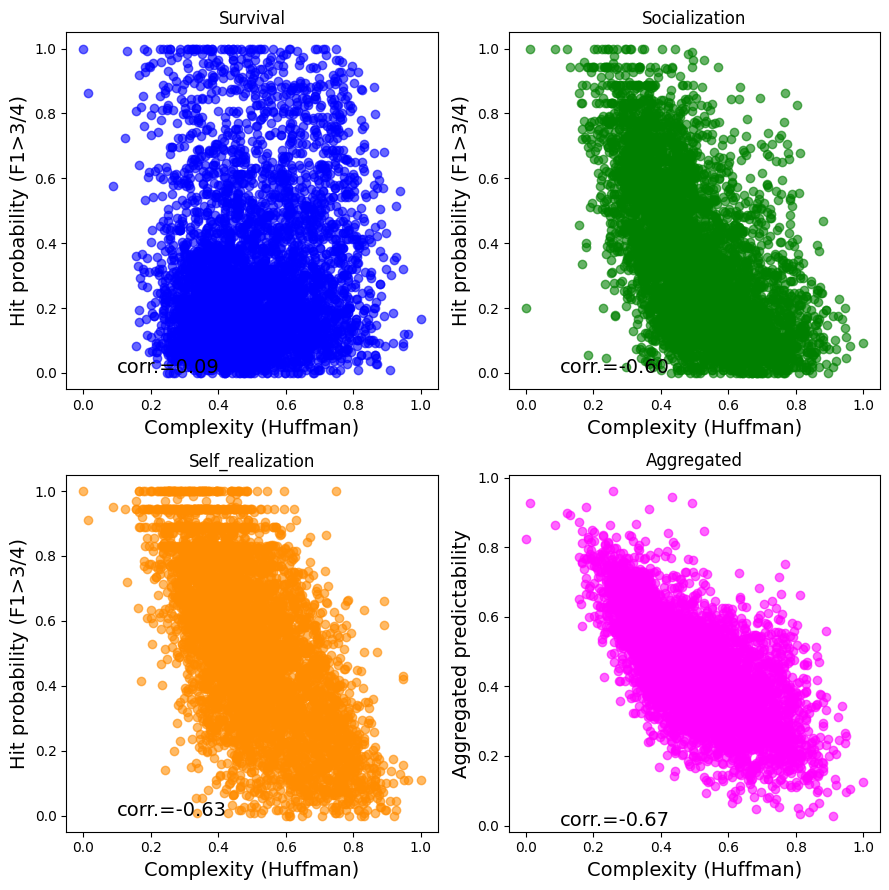

In [19]:
'''Fig. 5'''
columns=['survival','socialization','self_realization','aggregated']
colors=['blue', 'green','darkorange', 'magenta']
labels=['Hit probability (F1>3/4)']*3+['Aggregated predictability']
plt.figure(figsize=(9,9))
for i,j in enumerate(zip(columns, colors, labels)):
    plt.subplot(2,2,i+1)
    plt.title(j[0].capitalize())
    plt.xlabel('Complexity (Huffman)',size=14)
    plt.ylabel(j[2],size=14)
    plt.scatter(hor.Huffman, hor[j[0]], alpha=.6, c=j[1])
    plt.text(0.1, 0.0, 'corr.=%.2f'%np.corrcoef(hor.Huffman, hor[j[0]])[0,1], size=14)
plt.tight_layout()
# plt.savefig('Fig5.png',dpi=600, format='png',
#         bbox_inches=None, pad_inches=0.1,
#         facecolor='auto'
#        )
plt.show()

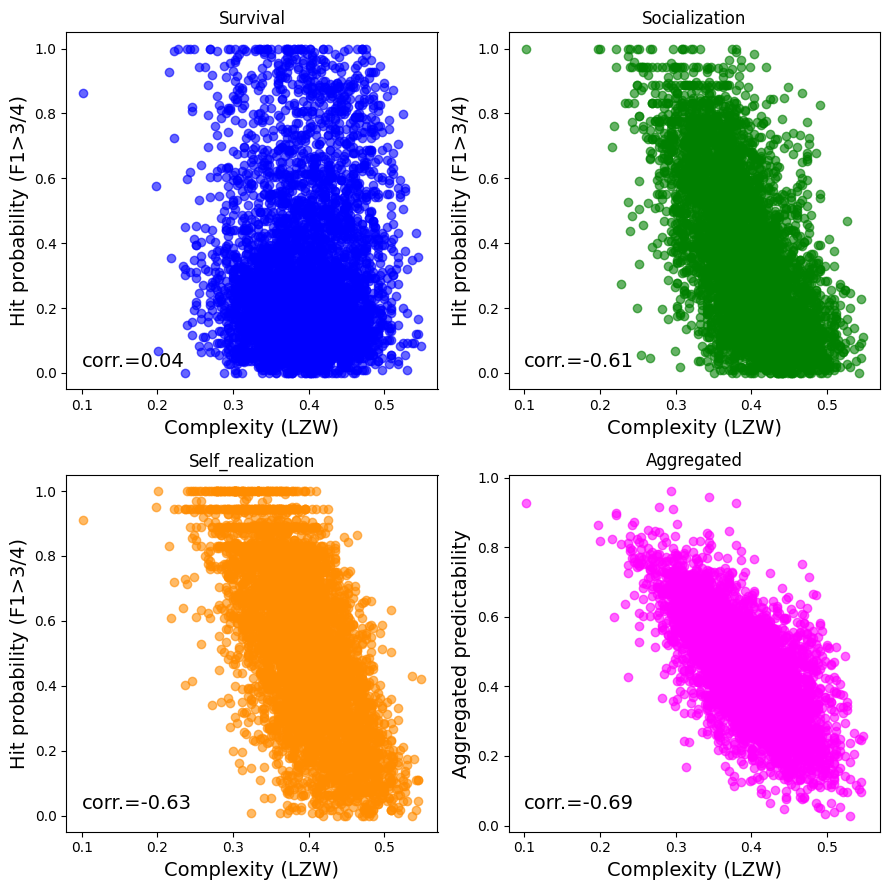

In [20]:
'''Fig. 6 (8)'''
columns=['survival','socialization','self_realization','aggregated']
colors=['blue', 'green','darkorange', 'magenta']
labels=['Hit probability (F1>3/4)']*3+['Aggregated predictability']
plt.figure(figsize=(9,9))
for i,j in enumerate(zip(columns, colors, labels)):
    plt.subplot(2,2,i+1)
    plt.title(j[0].capitalize())
    plt.xlabel('Complexity (LZW)', size=14)
    plt.ylabel(j[2], size=14)
    plt.scatter(hor.LZW, hor[j[0]], alpha=.6, c=j[1])
    y=hor[j[0]].min()+.02
    plt.text(0.1, y, 'corr.=%.2f'%np.corrcoef(hor.LZW, hor[j[0]])[0,1], size=14)
plt.tight_layout()
# plt.savefig('Fig6.png',dpi=600, format='png',
#         bbox_inches=None, pad_inches=0.1,
#         facecolor='auto'
#        )